## Min-Max Scaling

- scaled_value = (Xi - Xmin) / (Xmax - Xmin)
- Range is between 0 to 1


### MinMax Scaling on wine data

In [2]:
# IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("C:\\Users\\siddh\\OneDrive\\Desktop\\Data science data\\Preprocessing\\wine_data.csv",header=None,usecols=[0,1,2])
df.columns = ['Label','Alcohol','Malic acid']
df.head()

,Label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


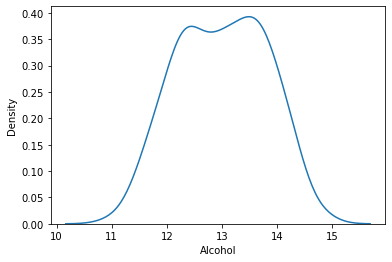

In [7]:
# DISTRIBUTION OF ALCOHOL
sns.kdeplot(df['Alcohol'])
plt.show()

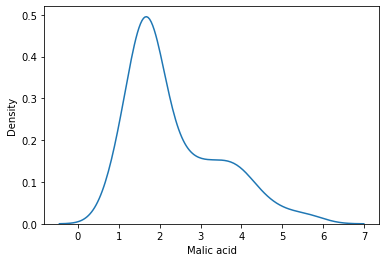

In [8]:
# DISTRIBUTION OF MALIC ACID
sns.kdeplot(df['Malic acid'])
plt.show()

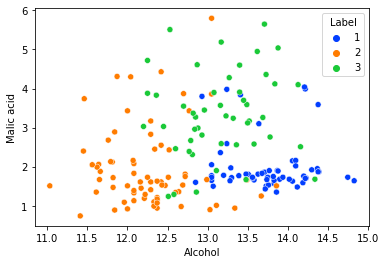

In [12]:
# DATAPOINTS DISTRIBUTION
sns.scatterplot(x = df['Alcohol'],y = df['Malic acid'],hue=df['Label'] , palette='bright')
plt.show()

In [13]:
# TRAIN TEST SPLIT
X = df.drop(columns=['Label'])
y = df['Label']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

X_train.shape,X_test.shape

((124, 2), (54, 2))

In [14]:
# MINMAX SCALING
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [15]:
# FITTING SCALER TO TRAINING DATA
scaler.fit(X_train)

MinMaxScaler()

In [16]:
# TRANSFORMING TRAINING AND TEST DATA
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# CONVERTING SCALED ARRAY TO DATAFRAME
X_train_scaled = pd.DataFrame(X_train_scaled , columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns = X_test.columns)

In [18]:
# STATISTICS OF ORIGINAL DATA
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [19]:
# STATISTICS OF SCALED DATA
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


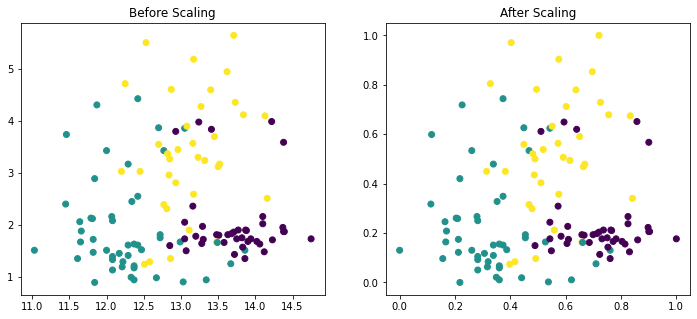

In [25]:
# COMPARISON OF DISTRIBUTION BEFORE AND AFTER SCALING

fig , (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Alcohol'],X_train['Malic acid'],c=y_train)
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic acid'],c=y_train)
ax2.set_title('After Scaling')
plt.show()

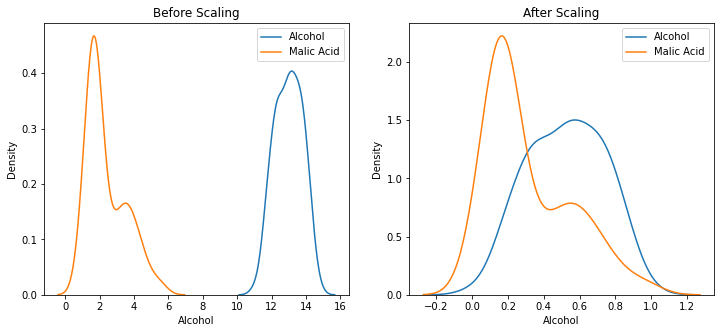

In [39]:
fig , (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

# Before Scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'],ax=ax1 )
sns.kdeplot(X_train['Malic acid'],ax=ax1)


# After Scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'],ax=ax2)

ax1.legend(['Alcohol','Malic Acid'])
ax2.legend(['Alcohol','Malic Acid'])
plt.show()

